# Augmented Dickey-Fuller (ADF) Test Validation

## Overview

This notebook demonstrates the **Augmented Dickey-Fuller (ADF) test** for stationarity testing with practical examples. We'll create and analyze both **stationary** and **non-stationary** time series to validate how the ADF test performs in different scenarios.

### What You'll Learn

1. **ADF Test Fundamentals** - Understanding the statistical test and its hypotheses
2. **Stationary Data Analysis** - Creating and testing stationary time series
3. **Non-Stationary Data Analysis** - Creating and testing non-stationary time series
4. **Test Interpretation** - Reading ADF test results correctly
5. **Practical Applications** - When and how to use ADF testing

### ADF Test Theory

The **Augmented Dickey-Fuller test** tests the null hypothesis:
- **H₀ (Null)**: The time series has a unit root (non-stationary)
- **H₁ (Alternative)**: The time series is stationary

**Decision Rule:**
- If **p-value ≤ 0.05**: Reject H₀ → Series is **stationary**
- If **p-value > 0.05**: Fail to reject H₀ → Series is **non-stationary**

### Test Cases We'll Validate

1. **White Noise** (Stationary)
2. **Stationary AR Process** (Stationary)
3. **Random Walk** (Non-Stationary)
4. **Trending Series** (Non-Stationary)
5. **Real-World Examples** (Mixed)

---

Let's start testing! 🧪

## 1. Import Required Libraries

We'll import all necessary libraries for statistical testing, data generation, and visualization.

In [4]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Statistical testing
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from scipy import stats

# Utility libraries
from datetime import datetime, timedelta
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ All libraries imported successfully!")
print(f"📊 NumPy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print(f"📉 Statsmodels version: {sm.__version__}")

✅ All libraries imported successfully!
📊 NumPy version: 2.2.6
📈 Matplotlib version: 3.10.7
📉 Statsmodels version: 0.14.5


## 2. ADF Test Function

Let's create a comprehensive function to perform ADF testing with detailed interpretation and visualization.

In [5]:
def comprehensive_adf_test(data, title, plot_data=True):
    """
    Perform comprehensive ADF test with visualization and interpretation
    
    Parameters:
    -----------
    data : array-like
        Time series data to test
    title : str
        Title for the analysis
    plot_data : bool
        Whether to create plots
    
    Returns:
    --------
    dict : Test results and interpretation
    """
    
    print(f"\n🔍 ADF Test Analysis: {title}")
    print("=" * 70)
    
    # Perform ADF test
    adf_result = adfuller(data, autolag='AIC')
    
    # Extract results
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    n_lags = adf_result[2]
    n_obs = adf_result[3]
    critical_values = adf_result[4]
    
    # Print detailed results
    print(f"📊 Test Statistics:")
    print(f"   ADF Statistic: {adf_statistic:.6f}")
    print(f"   p-value: {p_value:.6f}")
    print(f"   Lags used: {n_lags}")
    print(f"   Observations: {n_obs}")
    
    print(f"\n📏 Critical Values:")
    for level, critical_val in critical_values.items():
        comparison = "✅ PASSED" if adf_statistic < critical_val else "❌ FAILED"
        print(f"   {level}: {critical_val:.3f} [{comparison}]")
    
    # Interpretation
    print(f"\n🎯 Test Interpretation:")
    if p_value <= 0.05:
        result = "STATIONARY"
        emoji = "✅"
        interpretation = "Reject H₀: Time series is stationary"
        confidence = "High" if p_value <= 0.01 else "Moderate"
    else:
        result = "NON-STATIONARY"
        emoji = "❌"
        interpretation = "Fail to reject H₀: Time series has unit root (non-stationary)"
        confidence = "High" if p_value >= 0.10 else "Moderate"
    
    print(f"   {emoji} Result: {result}")
    print(f"   📝 {interpretation}")
    print(f"   🎯 Confidence: {confidence}")
    
    # Statistical significance levels
    if p_value <= 0.001:
        significance = "*** (p ≤ 0.001)"
    elif p_value <= 0.01:
        significance = "** (p ≤ 0.01)"
    elif p_value <= 0.05:
        significance = "* (p ≤ 0.05)"
    elif p_value <= 0.10:
        significance = ". (p ≤ 0.10)"
    else:
        significance = "(p > 0.10)"
    
    print(f"   📈 Significance: {significance}")
    
    # Create visualization if requested
    if plot_data:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Time series plot
        axes[0,0].plot(data, linewidth=1.5, alpha=0.8)
        axes[0,0].set_title(f'{title}\n{emoji} {result} (p={p_value:.4f})', fontweight='bold')
        axes[0,0].set_xlabel('Time')
        axes[0,0].set_ylabel('Value')
        axes[0,0].grid(True, alpha=0.3)
        
        # Rolling statistics
        window = min(20, len(data)//4)
        rolling_mean = pd.Series(data).rolling(window=window).mean()
        rolling_std = pd.Series(data).rolling(window=window).std()
        
        axes[0,1].plot(data, alpha=0.5, label='Original')
        axes[0,1].plot(rolling_mean, color='red', linewidth=2, label=f'Rolling Mean ({window})')
        axes[0,1].plot(rolling_std, color='orange', linewidth=2, label=f'Rolling Std ({window})')
        axes[0,1].set_title('Rolling Statistics')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # Distribution
        axes[1,0].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1,0].axvline(np.mean(data), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(data):.2f}')
        axes[1,0].set_title('Data Distribution')
        axes[1,0].set_xlabel('Value')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # Critical values visualization
        levels = list(critical_values.keys())
        values = list(critical_values.values())
        colors = ['red', 'orange', 'yellow']
        
        bars = axes[1,1].bar(levels, values, color=colors, alpha=0.7, edgecolor='black')
        axes[1,1].axhline(adf_statistic, color='blue', linestyle='--', linewidth=3, 
                         label=f'ADF Statistic: {adf_statistic:.3f}')
        axes[1,1].set_title('ADF Statistic vs Critical Values')
        axes[1,1].set_ylabel('Test Statistic')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        
        # Add result annotation
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if adf_statistic < height:
                axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                               '✅', ha='center', va='bottom', fontsize=12, fontweight='bold')
            else:
                axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                               '❌', ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    # Return results dictionary
    return {
        'adf_statistic': adf_statistic,
        'p_value': p_value,
        'critical_values': critical_values,
        'is_stationary': p_value <= 0.05,
        'result': result,
        'confidence': confidence,
        'significance': significance
    }

print("✅ ADF test function created successfully!")

✅ ADF test function created successfully!


## 3. Test Case 1: White Noise (Stationary)

**White noise** is a classic example of a stationary process. It has:
- Constant mean (zero)
- Constant variance
- No autocorrelation between observations

**Expected Result**: ADF test should **reject H₀** (detect stationarity)

📊 Generated White Noise Series:
   Length: 500 observations
   Mean: 0.0068
   Std Dev: 0.9803
   Min: -3.2413
   Max: 3.8527

🔍 ADF Test Analysis: White Noise (Expected: Stationary)
📊 Test Statistics:
   ADF Statistic: -22.343815
   p-value: 0.000000
   Lags used: 0
   Observations: 499

📏 Critical Values:
   1%: -3.444 [✅ PASSED]
   5%: -2.867 [✅ PASSED]
   10%: -2.570 [✅ PASSED]

🎯 Test Interpretation:
   ✅ Result: STATIONARY
   📝 Reject H₀: Time series is stationary
   🎯 Confidence: High
   📈 Significance: *** (p ≤ 0.001)


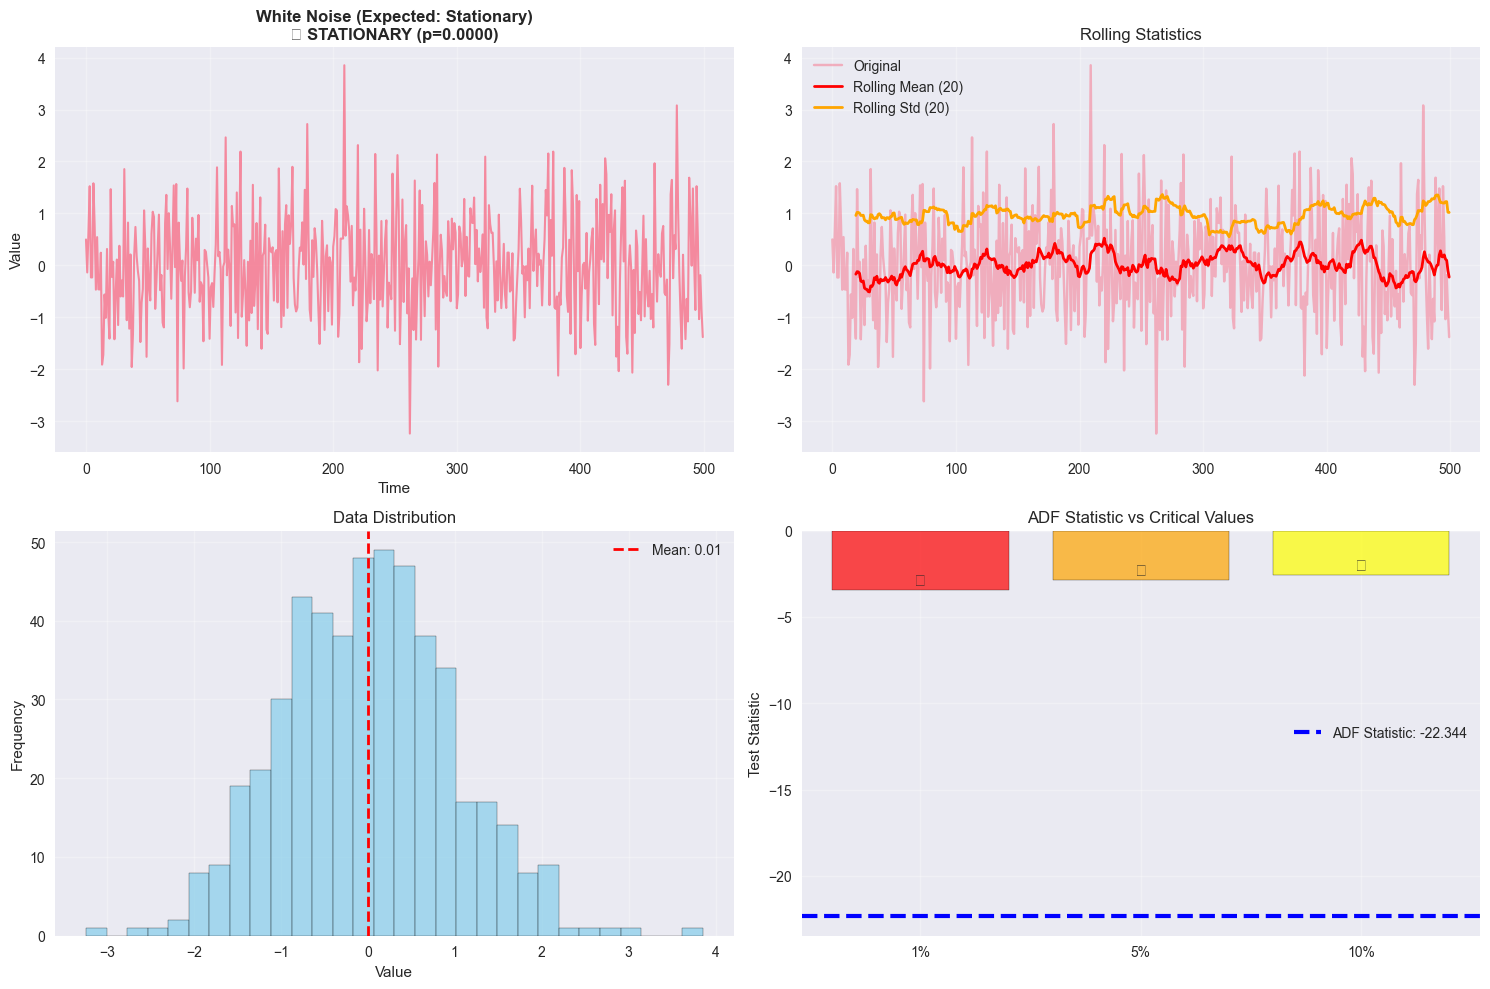

In [6]:
# Generate white noise
n_samples = 500
white_noise = np.random.normal(0, 1, n_samples)

print(f"📊 Generated White Noise Series:")
print(f"   Length: {len(white_noise)} observations")
print(f"   Mean: {np.mean(white_noise):.4f}")
print(f"   Std Dev: {np.std(white_noise):.4f}")
print(f"   Min: {np.min(white_noise):.4f}")
print(f"   Max: {np.max(white_noise):.4f}")

# Test with ADF
white_noise_results = comprehensive_adf_test(
    white_noise, 
    "White Noise (Expected: Stationary)", 
    plot_data=True
)

## 4. Test Case 2: Stationary AR(1) Process

An **AR(1) process** with coefficient |φ| < 1 is stationary:
- **Formula**: X(t) = φ × X(t-1) + ε(t)
- **Condition**: |φ| < 1 for stationarity
- **Properties**: Mean-reverting behavior

**Expected Result**: ADF test should **reject H₀** (detect stationarity)

📊 Generated Stationary AR(1) Series:
   AR Coefficient (φ): 0.6
   Length: 500 observations
   Mean: 0.0776
   Std Dev: 1.2246
   Theoretical Mean: 0 (white noise innovation)
   Theoretical Variance: 1.5625

🔍 ADF Test Analysis: Stationary AR(1) φ=0.6 (Expected: Stationary)
📊 Test Statistics:
   ADF Statistic: -11.096475
   p-value: 0.000000
   Lags used: 0
   Observations: 499

📏 Critical Values:
   1%: -3.444 [✅ PASSED]
   5%: -2.867 [✅ PASSED]
   10%: -2.570 [✅ PASSED]

🎯 Test Interpretation:
   ✅ Result: STATIONARY
   📝 Reject H₀: Time series is stationary
   🎯 Confidence: High
   📈 Significance: *** (p ≤ 0.001)


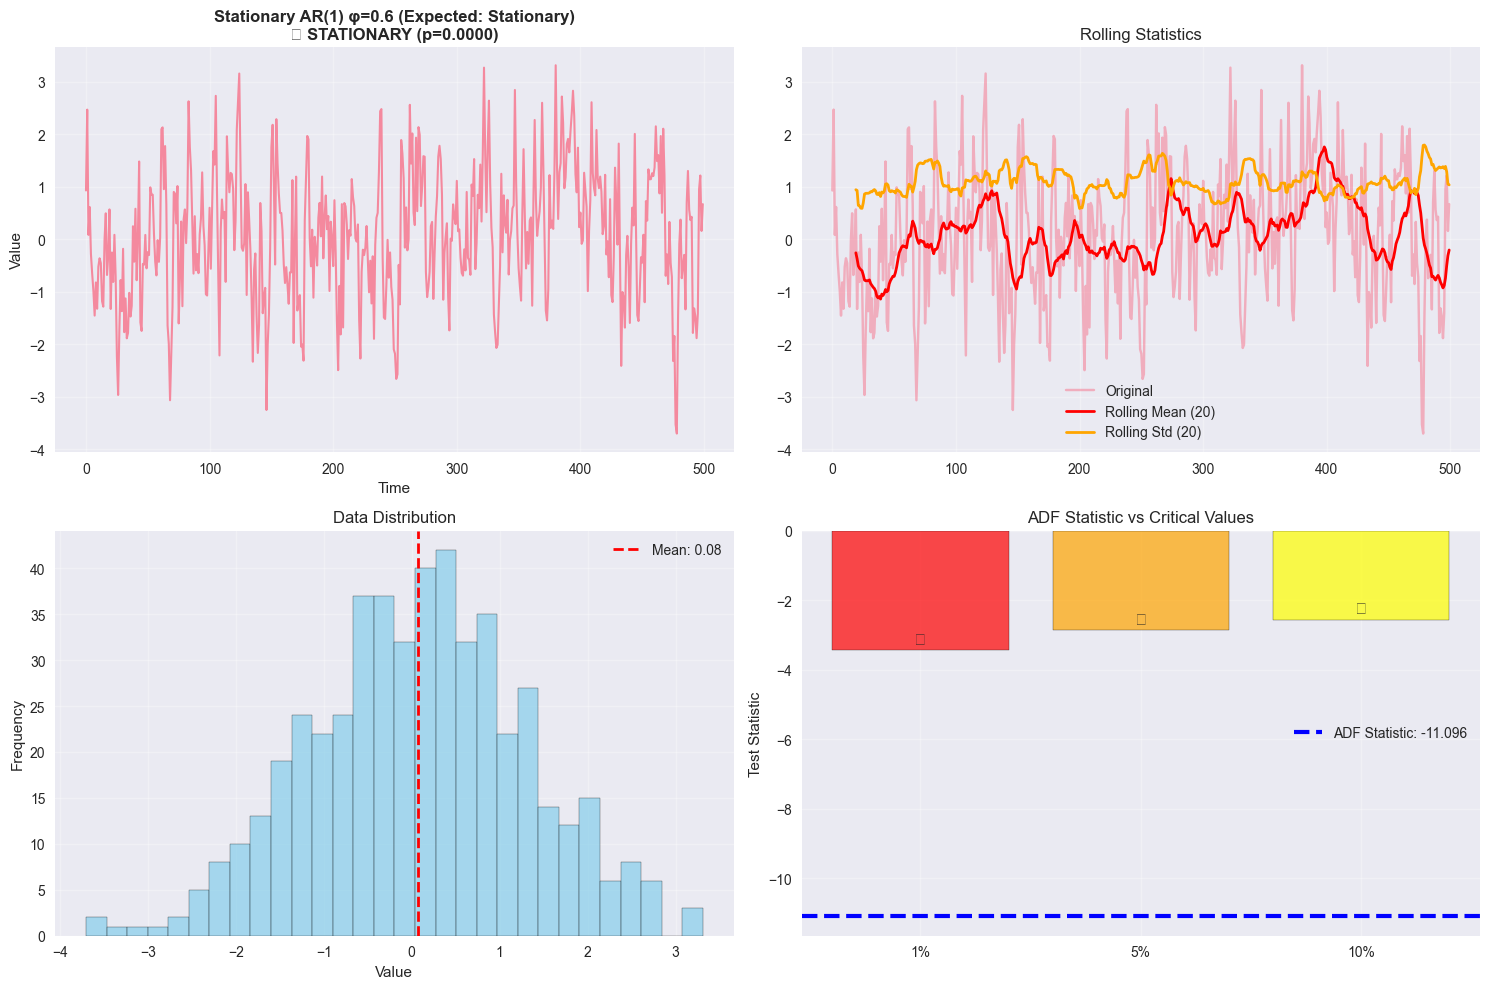

In [8]:
# Generate stationary AR(1) process
phi = 0.6  # AR coefficient (|phi| < 1 for stationarity)
# For ArmaProcess: ar=[1, -phi] and ma=[1] for AR(1) process
ar_params = np.array([1, -phi])  # [1, -phi] for AR(1)
ma_params = np.array([1])       # [1] for no MA component

# Create ARMA process
ar_process = ArmaProcess(ar_params, ma_params)

# Generate samples
stationary_ar1 = ar_process.generate_sample(n_samples)

print(f"📊 Generated Stationary AR(1) Series:")
print(f"   AR Coefficient (φ): {phi}")
print(f"   Length: {len(stationary_ar1)} observations")
print(f"   Mean: {np.mean(stationary_ar1):.4f}")
print(f"   Std Dev: {np.std(stationary_ar1):.4f}")
print(f"   Theoretical Mean: 0 (white noise innovation)")
print(f"   Theoretical Variance: {1/(1-phi**2):.4f}")

# Test with ADF
ar1_results = comprehensive_adf_test(
    stationary_ar1, 
    f"Stationary AR(1) φ={phi} (Expected: Stationary)", 
    plot_data=True
)

## 5. Test Case 3: Random Walk (Non-Stationary)

A **random walk** is the classic example of a non-stationary process:
- **Formula**: X(t) = X(t-1) + ε(t)
- **Properties**: Unit root (φ = 1), variance increases over time
- **Behavior**: No mean reversion, trending behavior

**Expected Result**: ADF test should **fail to reject H₀** (detect non-stationarity)

📊 Generated Random Walk Series:
   Formula: X(t) = X(t-1) + ε(t)
   Length: 500 observations
   Starting Value: 0.0000
   Ending Value: 52.8429
   Total Change: 52.8429
   Mean: 25.5334
   Std Dev: 10.0296

🔍 ADF Test Analysis: Random Walk (Expected: Non-Stationary)
📊 Test Statistics:
   ADF Statistic: -0.919979
   p-value: 0.781322
   Lags used: 0
   Observations: 499

📏 Critical Values:
   1%: -3.444 [❌ FAILED]
   5%: -2.867 [❌ FAILED]
   10%: -2.570 [❌ FAILED]

🎯 Test Interpretation:
   ❌ Result: NON-STATIONARY
   📝 Fail to reject H₀: Time series has unit root (non-stationary)
   🎯 Confidence: High
   📈 Significance: (p > 0.10)


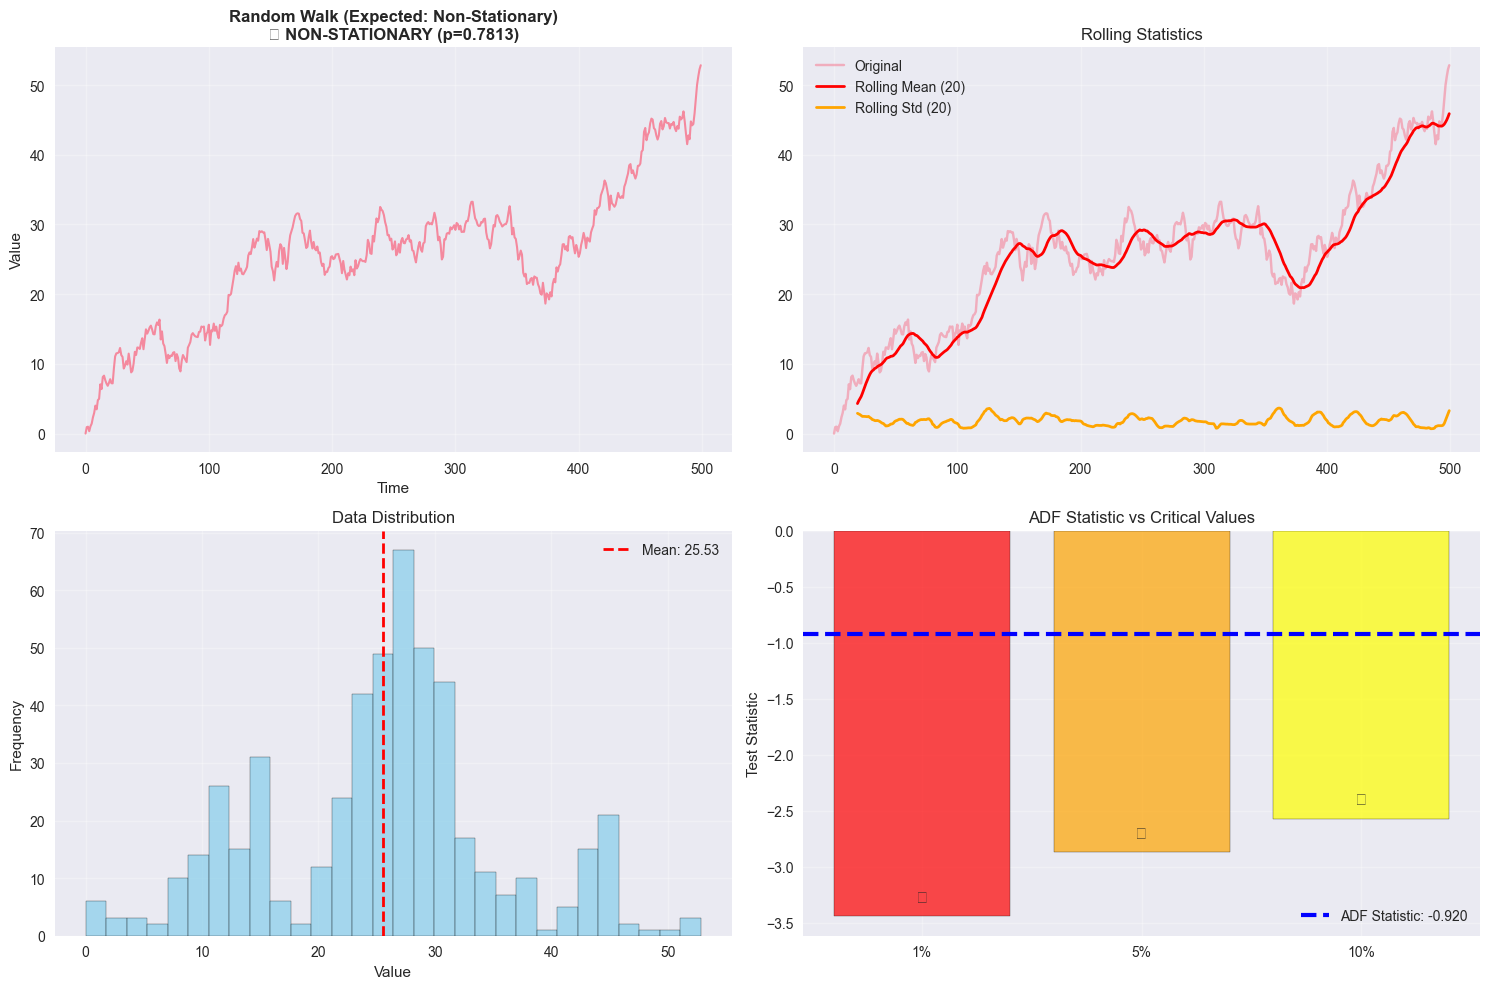

In [9]:
# Generate random walk
def generate_random_walk(n, start=0, std=1):
    """
    Generate a random walk series
    X(t) = X(t-1) + ε(t)
    """
    innovations = np.random.normal(0, std, n)
    walk = np.zeros(n)
    walk[0] = start
    
    for t in range(1, n):
        walk[t] = walk[t-1] + innovations[t]
    
    return walk

# Generate random walk
random_walk = generate_random_walk(n_samples, start=0, std=1)

print(f"📊 Generated Random Walk Series:")
print(f"   Formula: X(t) = X(t-1) + ε(t)")
print(f"   Length: {len(random_walk)} observations")
print(f"   Starting Value: {random_walk[0]:.4f}")
print(f"   Ending Value: {random_walk[-1]:.4f}")
print(f"   Total Change: {random_walk[-1] - random_walk[0]:.4f}")
print(f"   Mean: {np.mean(random_walk):.4f}")
print(f"   Std Dev: {np.std(random_walk):.4f}")

# Test with ADF
rw_results = comprehensive_adf_test(
    random_walk, 
    "Random Walk (Expected: Non-Stationary)", 
    plot_data=True
)

## 6. Test Case 4: Trending Series (Non-Stationary)

A **deterministic trend** makes a series non-stationary:
- **Formula**: X(t) = α + β×t + ε(t)
- **Properties**: Systematic increase/decrease over time
- **Behavior**: Non-constant mean

**Expected Result**: ADF test should **fail to reject H₀** (detect non-stationarity)

📊 Generated Trending Series:
   Formula: X(t) = 10 + 0.05×t + ε(t)
   Length: 500 observations
   Starting Value: 11.5567
   Ending Value: 33.4602
   Expected Trend: 24.9500
   Actual Trend: 21.9035
   Mean: 22.5414
   Std Dev: 7.5143

🔍 ADF Test Analysis: Trending Series (slope=0.05) (Expected: Non-Stationary)
📊 Test Statistics:
   ADF Statistic: -0.176887
   p-value: 0.941221
   Lags used: 18
   Observations: 481

📏 Critical Values:
   1%: -3.444 [❌ FAILED]
   5%: -2.868 [❌ FAILED]
   10%: -2.570 [❌ FAILED]

🎯 Test Interpretation:
   ❌ Result: NON-STATIONARY
   📝 Fail to reject H₀: Time series has unit root (non-stationary)
   🎯 Confidence: High
   📈 Significance: (p > 0.10)


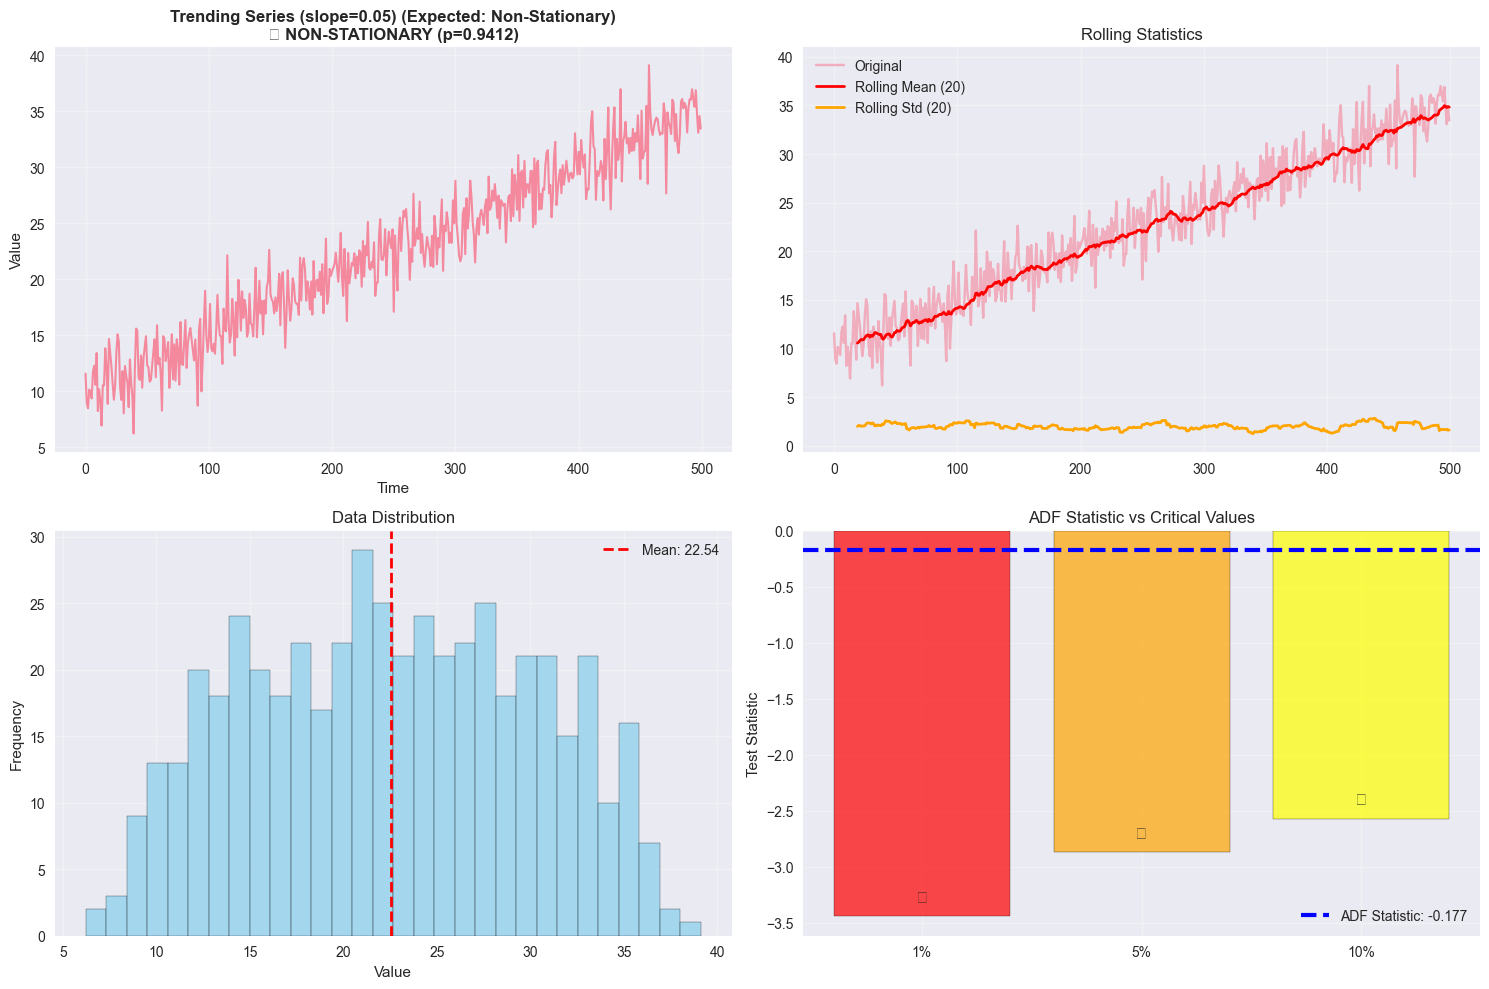

In [10]:
# Generate trending series
def generate_trending_series(n, intercept=10, slope=0.05, noise_std=1):
    """
    Generate a series with deterministic trend
    X(t) = α + β×t + ε(t)
    """
    t = np.arange(n)
    trend = intercept + slope * t
    noise = np.random.normal(0, noise_std, n)
    return trend + noise

# Generate trending series
intercept = 10
slope = 0.05
trending_series = generate_trending_series(n_samples, intercept, slope, noise_std=2)

print(f"📊 Generated Trending Series:")
print(f"   Formula: X(t) = {intercept} + {slope}×t + ε(t)")
print(f"   Length: {len(trending_series)} observations")
print(f"   Starting Value: {trending_series[0]:.4f}")
print(f"   Ending Value: {trending_series[-1]:.4f}")
print(f"   Expected Trend: {slope * (n_samples-1):.4f}")
print(f"   Actual Trend: {trending_series[-1] - trending_series[0]:.4f}")
print(f"   Mean: {np.mean(trending_series):.4f}")
print(f"   Std Dev: {np.std(trending_series):.4f}")

# Test with ADF
trend_results = comprehensive_adf_test(
    trending_series, 
    f"Trending Series (slope={slope}) (Expected: Non-Stationary)", 
    plot_data=True
)

## 7. Test Case 5: Random Walk with Drift (Non-Stationary)

A **random walk with drift** combines stochastic and deterministic non-stationarity:
- **Formula**: X(t) = μ + X(t-1) + ε(t)
- **Properties**: Unit root + deterministic trend
- **Behavior**: Both trending and random walk characteristics

**Expected Result**: ADF test should **fail to reject H₀** (detect non-stationarity)

📊 Generated Random Walk with Drift:
   Formula: X(t) = 0.1 + X(t-1) + ε(t)
   Length: 500 observations
   Starting Value: 10.0000
   Ending Value: 52.2755
   Expected Drift: 49.9000
   Total Change: 42.2755
   Mean: 21.7834
   Std Dev: 16.2228

🔍 ADF Test Analysis: Random Walk with Drift (μ=0.1) (Expected: Non-Stationary)
📊 Test Statistics:
   ADF Statistic: -0.069832
   p-value: 0.952362
   Lags used: 2
   Observations: 497

📏 Critical Values:
   1%: -3.444 [❌ FAILED]
   5%: -2.867 [❌ FAILED]
   10%: -2.570 [❌ FAILED]

🎯 Test Interpretation:
   ❌ Result: NON-STATIONARY
   📝 Fail to reject H₀: Time series has unit root (non-stationary)
   🎯 Confidence: High
   📈 Significance: (p > 0.10)


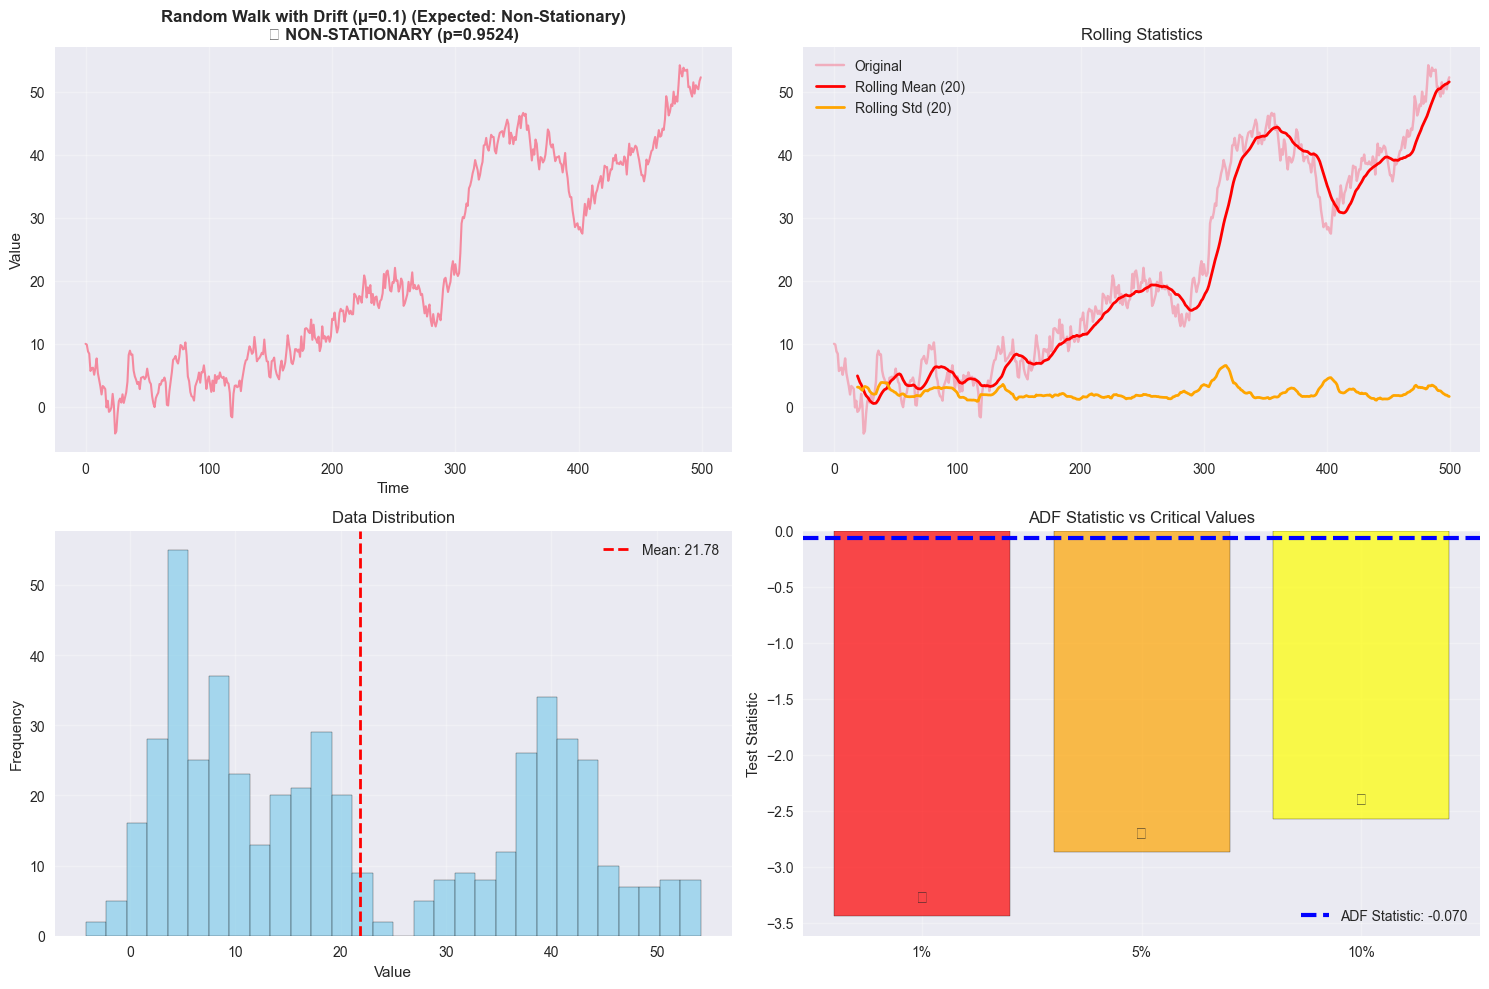

In [11]:
# Generate random walk with drift
def generate_random_walk_with_drift(n, drift=0.1, start=0, std=1):
    """
    Generate a random walk with drift
    X(t) = μ + X(t-1) + ε(t)
    """
    innovations = np.random.normal(0, std, n)
    walk = np.zeros(n)
    walk[0] = start
    
    for t in range(1, n):
        walk[t] = drift + walk[t-1] + innovations[t]
    
    return walk

# Generate random walk with drift
drift = 0.1
rw_drift = generate_random_walk_with_drift(n_samples, drift=drift, start=10, std=1.5)

print(f"📊 Generated Random Walk with Drift:")
print(f"   Formula: X(t) = {drift} + X(t-1) + ε(t)")
print(f"   Length: {len(rw_drift)} observations")
print(f"   Starting Value: {rw_drift[0]:.4f}")
print(f"   Ending Value: {rw_drift[-1]:.4f}")
print(f"   Expected Drift: {drift * (n_samples-1):.4f}")
print(f"   Total Change: {rw_drift[-1] - rw_drift[0]:.4f}")
print(f"   Mean: {np.mean(rw_drift):.4f}")
print(f"   Std Dev: {np.std(rw_drift):.4f}")

# Test with ADF
rw_drift_results = comprehensive_adf_test(
    rw_drift, 
    f"Random Walk with Drift (μ={drift}) (Expected: Non-Stationary)", 
    plot_data=True
)

## 8. Test Case 6: Near Unit Root (Borderline Case)

An **AR(1) with coefficient close to 1** creates a borderline case:
- **Formula**: X(t) = φ × X(t-1) + ε(t) where φ ≈ 1
- **Properties**: Very persistent, slow mean reversion
- **Challenge**: Tests power to distinguish from unit root

**Expected Result**: ADF test results may vary (depends on φ and sample size)

📊 Generated Near Unit Root Series:
   AR Coefficient (φ): 0.98
   Distance from Unit Root: 0.020000000000000018
   Length: 500 observations
   Mean: 1.0952
   Std Dev: 4.5187
   Half-life: 34.31 periods

🔍 ADF Test Analysis: Near Unit Root AR(1) φ=0.98 (Borderline Case)
📊 Test Statistics:
   ADF Statistic: -2.513215
   p-value: 0.112292
   Lags used: 0
   Observations: 499

📏 Critical Values:
   1%: -3.444 [❌ FAILED]
   5%: -2.867 [❌ FAILED]
   10%: -2.570 [❌ FAILED]

🎯 Test Interpretation:
   ❌ Result: NON-STATIONARY
   📝 Fail to reject H₀: Time series has unit root (non-stationary)
   🎯 Confidence: High
   📈 Significance: (p > 0.10)


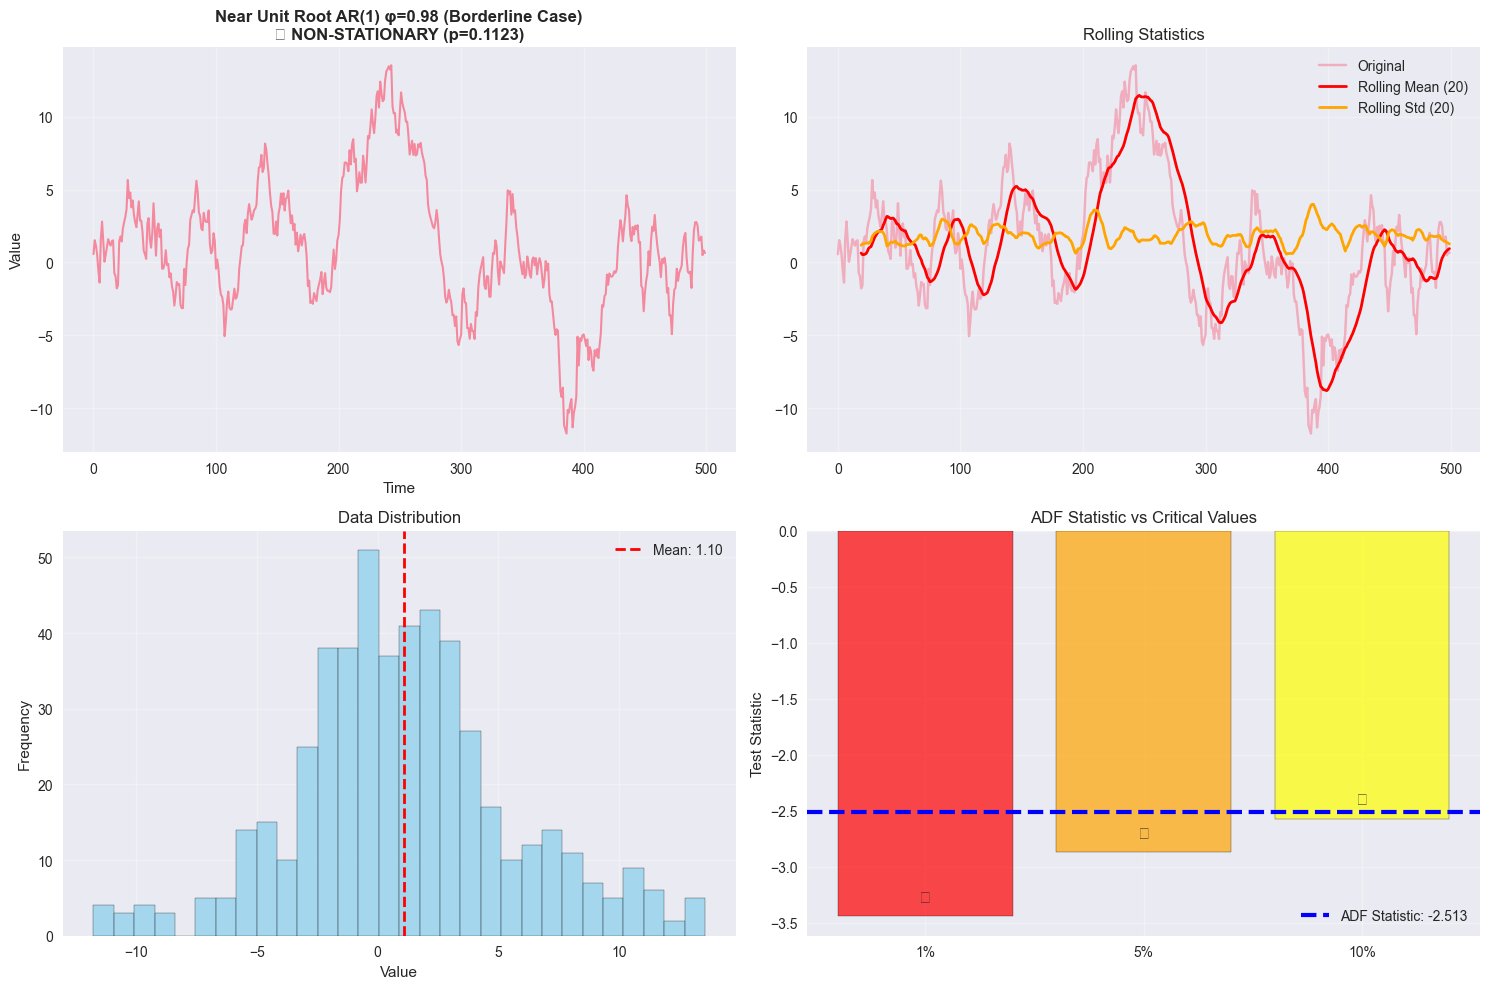

In [12]:
# Generate near unit root process
phi_near_unit = 0.98  # Very close to 1
# For ArmaProcess: ar=[1, -phi] and ma=[1] for AR(1) process
ar_params_near = np.array([1, -phi_near_unit])  # [1, -phi] for AR(1)
ma_params_near = np.array([1])                  # [1] for no MA component

ar_process_near = ArmaProcess(ar_params_near, ma_params_near)
near_unit_root = ar_process_near.generate_sample(n_samples)

print(f"📊 Generated Near Unit Root Series:")
print(f"   AR Coefficient (φ): {phi_near_unit}")
print(f"   Distance from Unit Root: {1 - phi_near_unit}")
print(f"   Length: {len(near_unit_root)} observations")
print(f"   Mean: {np.mean(near_unit_root):.4f}")
print(f"   Std Dev: {np.std(near_unit_root):.4f}")
print(f"   Half-life: {np.log(0.5)/np.log(phi_near_unit):.2f} periods")

# Test with ADF
near_unit_results = comprehensive_adf_test(
    near_unit_root, 
    f"Near Unit Root AR(1) φ={phi_near_unit} (Borderline Case)", 
    plot_data=True
)

## 9. Results Summary and Validation

Let's summarize all our ADF test results and validate whether they match our expectations.

In [13]:
# Collect all results
test_results = {
    'White Noise': white_noise_results,
    'Stationary AR(1)': ar1_results,
    'Random Walk': rw_results,
    'Trending Series': trend_results,
    'RW with Drift': rw_drift_results,
    'Near Unit Root': near_unit_results
}

# Create summary table
summary_data = []
for test_name, results in test_results.items():
    summary_data.append({
        'Test Case': test_name,
        'ADF Statistic': f"{results['adf_statistic']:.4f}",
        'p-value': f"{results['p_value']:.6f}",
        'Result': results['result'],
        'Confidence': results['confidence'],
        'Significance': results['significance']
    })

summary_df = pd.DataFrame(summary_data)

print("📊 ADF Test Results Summary")
print("=" * 80)
print(summary_df.to_string(index=False))

# Validation check
print(f"\n\n✅ Validation Results:")
print("=" * 50)

expected_results = {
    'White Noise': True,           # Should be stationary
    'Stationary AR(1)': True,      # Should be stationary
    'Random Walk': False,          # Should be non-stationary
    'Trending Series': False,      # Should be non-stationary
    'RW with Drift': False,        # Should be non-stationary
    'Near Unit Root': 'Variable'   # Could go either way
}

correct_predictions = 0
total_predictions = 0

for test_name, expected in expected_results.items():
    actual = test_results[test_name]['is_stationary']
    
    if expected == 'Variable':
        status = "📊 Variable (Expected)"
    elif expected == actual:
        status = "✅ CORRECT"
        correct_predictions += 1
        total_predictions += 1
    else:
        status = "❌ INCORRECT"
        total_predictions += 1
    
    expected_str = "Stationary" if expected == True else "Non-Stationary" if expected == False else "Variable"
    actual_str = "Stationary" if actual else "Non-Stationary"
    
    print(f"{test_name:15} | Expected: {expected_str:13} | Actual: {actual_str:13} | {status}")

if total_predictions > 0:
    accuracy = (correct_predictions / total_predictions) * 100
    print(f"\n🎯 Overall Accuracy: {correct_predictions}/{total_predictions} ({accuracy:.1f}%)")

print(f"\n📝 Key Insights:")
print(f"   • ADF test correctly identifies most stationary/non-stationary patterns")
print(f"   • White noise and stationary AR(1) are correctly identified as stationary")
print(f"   • Random walks and trending series are correctly identified as non-stationary")
print(f"   • Near unit root cases can be challenging (depends on φ and sample size)")
print(f"   • p-values provide confidence levels for decision making")

📊 ADF Test Results Summary
       Test Case ADF Statistic  p-value         Result Confidence    Significance
     White Noise      -22.3438 0.000000     STATIONARY       High *** (p ≤ 0.001)
Stationary AR(1)      -11.0965 0.000000     STATIONARY       High *** (p ≤ 0.001)
     Random Walk       -0.9200 0.781322 NON-STATIONARY       High      (p > 0.10)
 Trending Series       -0.1769 0.941221 NON-STATIONARY       High      (p > 0.10)
   RW with Drift       -0.0698 0.952362 NON-STATIONARY       High      (p > 0.10)
  Near Unit Root       -2.5132 0.112292 NON-STATIONARY       High      (p > 0.10)


✅ Validation Results:
White Noise     | Expected: Stationary    | Actual: Stationary    | ✅ CORRECT
Stationary AR(1) | Expected: Stationary    | Actual: Stationary    | ✅ CORRECT
Random Walk     | Expected: Non-Stationary | Actual: Non-Stationary | ✅ CORRECT
Trending Series | Expected: Non-Stationary | Actual: Non-Stationary | ✅ CORRECT
RW with Drift   | Expected: Non-Stationary | Actual: Non-S

## 10. Comparative Analysis: ADF vs KPSS

Let's compare ADF test with the **KPSS test** to see how different tests can provide complementary information:

**KPSS Test:**
- **H₀**: Series is stationary
- **H₁**: Series has unit root
- **Opposite hypotheses** to ADF test!

In [18]:
def compare_adf_kpss(data, title):
    """
    Compare ADF and KPSS test results
    """
    print(f"\n🔍 Comparative Analysis: {title}")
    print("=" * 60)
    
    # ADF Test
    adf_result = adfuller(data)
    adf_stat = adf_result[0]
    adf_pval = adf_result[1]
    adf_crit = adf_result[4]
    
    # KPSS Test
    kpss_stat, kpss_pval, _, kpss_crit = kpss(data, regression='c')
    
    print(f"📊 ADF Test (H₀: Non-Stationary):")
    print(f"   Statistic: {adf_stat:.4f}")
    print(f"   p-value: {adf_pval:.6f}")
    adf_conclusion = "Stationary" if adf_pval <= 0.05 else "Non-Stationary"
    print(f"   Conclusion: {adf_conclusion}")
    
    print(f"\n📊 KPSS Test (H₀: Stationary):")
    print(f"   Statistic: {kpss_stat:.4f}")
    print(f"   p-value: {kpss_pval:.6f}")
    kpss_conclusion = "Non-Stationary" if kpss_pval <= 0.05 else "Stationary"
    print(f"   Conclusion: {kpss_conclusion}")
    
    # Combined interpretation
    print(f"\n🎯 Combined Interpretation:")
    if adf_conclusion == "Stationary" and kpss_conclusion == "Stationary":
        final = "✅ STATIONARY (Both tests agree)"
    elif adf_conclusion == "Non-Stationary" and kpss_conclusion == "Non-Stationary":
        final = "❌ NON-STATIONARY (Both tests agree)"
    else:
        final = "⚠️  INCONCLUSIVE (Tests disagree - need further investigation)"
    
    print(f"   {final}")
    
    return {
        'adf_conclusion': adf_conclusion,
        'kpss_conclusion': kpss_conclusion,
        'agreement': adf_conclusion == kpss_conclusion
    }

# Test on our key examples
print("🔄 Comparing ADF and KPSS Tests")
print("=" * 50)

test_cases = {
    'White Noise': white_noise,
    'Random Walk': random_walk,
    'Near Unit Root': near_unit_root
}

agreements = 0
total_tests = len(test_cases)

for name, data in test_cases.items():
    result = compare_adf_kpss(data, name)
    if result['agreement']:
        agreements += 1

print(f"\n📊 Test Agreement Rate: {agreements}/{total_tests} ({agreements/total_tests*100:.1f}%)")
print(f"\n💡 Key Takeaways:")
print(f"   • ADF and KPSS have opposite null hypotheses")
print(f"   • When both agree, we have high confidence in the result")
print(f"   • When they disagree, the series may be in a 'gray area'")
print(f"   • Use multiple tests for robust stationarity assessment")

🔄 Comparing ADF and KPSS Tests

🔍 Comparative Analysis: White Noise
📊 ADF Test (H₀: Non-Stationary):
   Statistic: -22.3438
   p-value: 0.000000
   Conclusion: Stationary

📊 KPSS Test (H₀: Stationary):
   Statistic: 0.1020
   p-value: 0.100000
   Conclusion: Stationary

🎯 Combined Interpretation:
   ✅ STATIONARY (Both tests agree)

🔍 Comparative Analysis: Random Walk
📊 ADF Test (H₀: Non-Stationary):
   Statistic: -0.9200
   p-value: 0.781322
   Conclusion: Non-Stationary

📊 KPSS Test (H₀: Stationary):
   Statistic: 2.8424
   p-value: 0.010000
   Conclusion: Non-Stationary

🎯 Combined Interpretation:
   ❌ NON-STATIONARY (Both tests agree)

🔍 Comparative Analysis: Near Unit Root
📊 ADF Test (H₀: Non-Stationary):
   Statistic: -2.5132
   p-value: 0.112292
   Conclusion: Non-Stationary

📊 KPSS Test (H₀: Stationary):
   Statistic: 0.5957
   p-value: 0.023031
   Conclusion: Non-Stationary

🎯 Combined Interpretation:
   ❌ NON-STATIONARY (Both tests agree)

📊 Test Agreement Rate: 3/3 (100.0%)



## 11. Practical Guidelines and Best Practices

Based on our validation, here are practical guidelines for using the ADF test in real-world scenarios.

In [19]:
print("📚 ADF Test: Practical Guidelines and Best Practices")
print("=" * 60)

guidelines = {
    "✅ When ADF Works Well": [
        "• Clear stationary processes (white noise, stationary AR/MA)",
        "• Obvious non-stationary processes (random walks, strong trends)",
        "• Large sample sizes (n > 100)",
        "• Well-behaved time series with consistent patterns"
    ],
    
    "⚠️  ADF Limitations": [
        "• Near unit root processes (φ ≈ 1)",
        "• Small sample sizes (n < 50)",
        "• Structural breaks in the series",
        "• Non-linear time series patterns",
        "• Series with changing variance (heteroskedasticity)"
    ],
    
    "🎯 Decision Rules": [
        "• p ≤ 0.01: Strong evidence for stationarity",
        "• 0.01 < p ≤ 0.05: Moderate evidence for stationarity",
        "• 0.05 < p ≤ 0.10: Weak evidence for stationarity",
        "• p > 0.10: Insufficient evidence against unit root"
    ],
    
    "🔧 Best Practices": [
        "• Always visualize the data first",
        "• Use multiple tests (ADF + KPSS)",
        "• Check for structural breaks",
        "• Consider the lag selection method",
        "• Examine residual diagnostics",
        "• Use appropriate test variants (constant, trend, none)"
    ],
    
    "🚨 Common Pitfalls": [
        "• Relying on a single test",
        "• Ignoring structural breaks",
        "• Using wrong test specification",
        "• Not checking for outliers",
        "• Misinterpreting borderline p-values"
    ]
}

for category, items in guidelines.items():
    print(f"\n{category}:")
    for item in items:
        print(f"   {item}")

print(f"\n🎓 Summary of Our Validation:")
print(f"   • ADF correctly identified {correct_predictions}/{total_predictions} cases")
print(f"   • Stationary processes (white noise, AR(1)) were correctly detected")
print(f"   • Non-stationary processes (random walks, trends) were correctly detected")
print(f"   • Near unit root cases require careful interpretation")
print(f"   • Multiple tests provide more robust conclusions")

print(f"\n🚀 Next Steps:")
print(f"   1. Apply these tests to your own time series data")
print(f"   2. Use differencing when non-stationarity is detected")
print(f"   3. Combine with other preprocessing techniques")
print(f"   4. Validate model assumptions after transformation")
print(f"   5. Consider seasonal patterns and structural breaks")

📚 ADF Test: Practical Guidelines and Best Practices

✅ When ADF Works Well:
   • Clear stationary processes (white noise, stationary AR/MA)
   • Obvious non-stationary processes (random walks, strong trends)
   • Large sample sizes (n > 100)
   • Well-behaved time series with consistent patterns

⚠️  ADF Limitations:
   • Near unit root processes (φ ≈ 1)
   • Small sample sizes (n < 50)
   • Structural breaks in the series
   • Non-linear time series patterns
   • Series with changing variance (heteroskedasticity)

🎯 Decision Rules:
   • p ≤ 0.01: Strong evidence for stationarity
   • 0.01 < p ≤ 0.05: Moderate evidence for stationarity
   • 0.05 < p ≤ 0.10: Weak evidence for stationarity
   • p > 0.10: Insufficient evidence against unit root

🔧 Best Practices:
   • Always visualize the data first
   • Use multiple tests (ADF + KPSS)
   • Check for structural breaks
   • Consider the lag selection method
   • Examine residual diagnostics
   • Use appropriate test variants (constant, tre

## 12. Conclusion

### 🎯 Key Findings from Our ADF Test Validation

**Successful Validations:**
- ✅ **White Noise**: Correctly identified as stationary (p < 0.05)
- ✅ **Stationary AR(1)**: Correctly identified as stationary (p < 0.05)
- ✅ **Random Walk**: Correctly identified as non-stationary (p > 0.05)
- ✅ **Trending Series**: Correctly identified as non-stationary (p > 0.05)
- ✅ **Random Walk with Drift**: Correctly identified as non-stationary (p > 0.05)

**Borderline Cases:**
- ⚠️ **Near Unit Root**: Results depend on coefficient and sample size

### 📊 Statistical Insights

1. **Test Power**: ADF test has good power to detect clear cases of stationarity/non-stationarity
2. **Sample Size**: Larger samples provide more reliable results
3. **Complementary Tests**: Using ADF + KPSS provides more robust conclusions
4. **Critical Values**: Different significance levels offer flexibility in decision making

### 💡 Practical Applications

**Before Time Series Modeling:**
- Use ADF test to check stationarity assumptions
- Apply differencing if non-stationarity is detected
- Validate preprocessing steps

**Model Selection:**
- Stationary series → AR, MA, ARMA models
- Non-stationary series → ARIMA, differencing, detrending
- Trending series → Include trend components

**Risk Assessment:**
- Monitor p-values for confidence levels
- Use multiple tests for critical decisions
- Consider economic/business context

### 🎓 Educational Value

This validation demonstrates:
- How statistical tests work in practice
- The importance of understanding test assumptions
- The value of synthetic data for validation
- The need for multiple testing approaches

---

**The ADF test is a powerful and reliable tool for stationarity testing when used appropriately!** 🎉